In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from models.disaggregation.dataloader import DisaggregationDataLoader
from models.disaggregation.cnn.model import DisaggregationConvNet

In [2]:
def rmse(y_true, y_pred): 
    return np.sqrt(np.mean((y_pred - y_true)**2))

In [3]:
# load model
model = DisaggregationConvNet((10, 192, 7), 4, 1)
model.load_model('models/disaggregation/cnn/trained_models/192_cnn_trained.h5')

# load data --> preprocessed, enriched with features
# filtered for "winterly data" as discussed in limitations, converted to kW/h (from (W/h)
path_ = '../data/model_input/schlemminger/disaggregation/ts_192_192_validation.p'
with open(path_, 'rb') as f: 
    x_test, aux_test, y_test = pickle.load(f)

In [4]:
y_pred = model.predict(x_test, aux=aux_test)

161/161 [==============================] - 1s 3ms/step


In [5]:
error = rmse(y_test, y_pred)

print(f'Root Mean Squared Error: {error}')

Root Mean Squared Error: 0.994035255717951


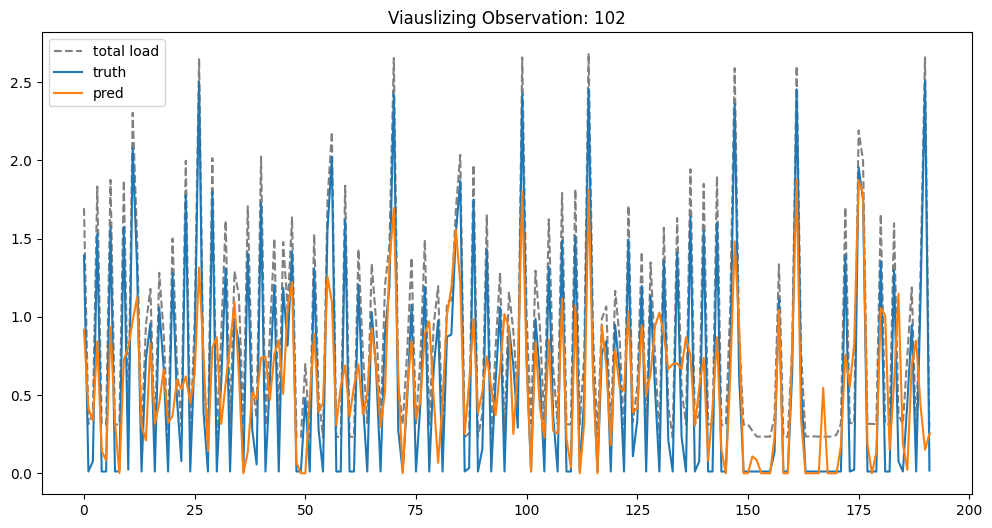

In [6]:
obs = np.random.randint(512)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(x_test[obs, :, 0], '--', label='total load', color='gray')
ax.plot(y_test[obs], label='truth')
ax.plot(y_pred[obs], label='pred')
plt.title(f'Viauslizing Observation: {obs}')
plt.legend()
plt.show()